# import libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid, softmax
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


# load dataset

In [36]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [37]:
X_train = train.drop('label', axis=1)
y_train = train['label']

In [38]:
X_train.shape, y_train.shape

((42000, 784), (42000,))

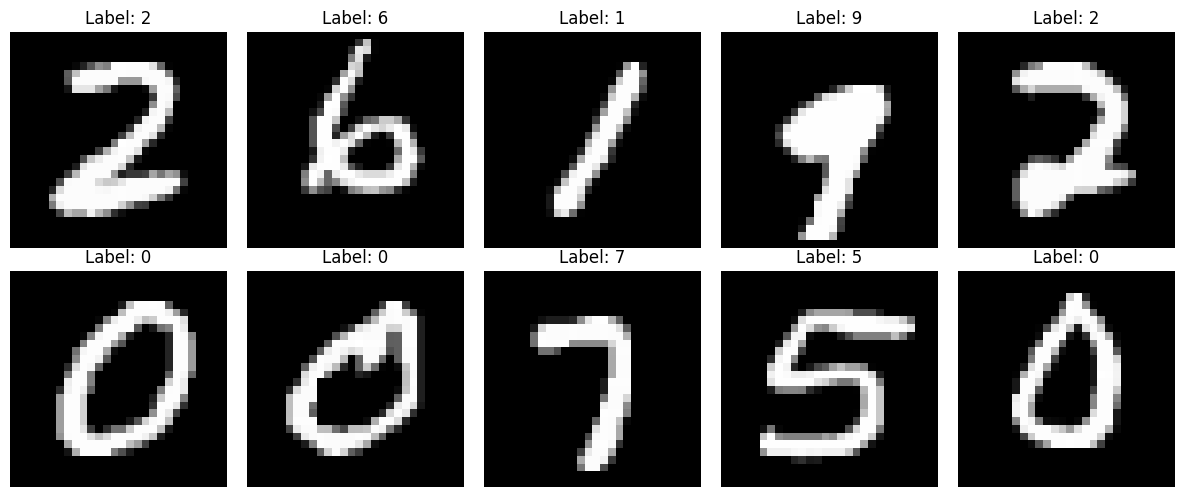

In [39]:
# Plot 10 random examples from the train data
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for ax in axes.ravel():
    idx = np.random.randint(0, X_train.shape[0])
    img = X_train.iloc[idx].values.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {y_train.iloc[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing and Model Training

Now that we've visualized some samples from the training data, let's move on to preprocessing the data and training a machine learning model to classify the images.

### normarilze the data

To scale pixel values from the range of 0-255 to 0.0-1.0, you can use **Min-Max Normalization**.

---

## Min-Max Normalization for Pixel Scaling

Given the original pixel values $x$ ranging from 0 to 255 (unsigned 8-bit integers), we want to normalize them to a new range of [0.0, 1.0].

The general formula for Min-Max Normalization is:

$x_{\text{normalized}} = \frac{x - \text{min}}{\text{max} - \text{min}}$

In this specific case:
* **min** (minimum original pixel value) = 0
* **max** (maximum original pixel value) = 255

Substituting these values into the formula, we get:

$x_{\text{normalized}} = \frac{x - 0}{255 - 0}$

Which simplifies to:

$x_{\text{normalized}} = \frac{x}{255}$

This means to normalize any pixel value $x$, you simply divide it by 255.

---

For example:
* A pixel value of 0 would become $0/255 = 0.0$
* A pixel value of 128 would become $128/255 \approx 0.502$
* A pixel value of 255 would become $255/255 = 1.0$

In [40]:
X_train=X_train/255.0
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024756,0.018172,0.012841,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


### Building a Neural Network for Handwritten Digit Classification

We'll build a simple feedforward neural network (Multi-Layer Perceptron, MLP) to classify the handwritten digit images. The network will take the normalized pixel values as input and output the predicted digit label (0-9).

**Network Architecture:**
- **Input Layer:** 784 neurons (one for each pixel in the 28x28 image)
- **Hidden Layers:** One or more fully connected layers with ReLU activation **two hidden layers one 25 units, 10 units using relu activation**
- **Output Layer:** 10 neurons (one for each digit class), with softmax activation

**Training:**
- We'll use categorical cross-entropy loss and an optimizer like Adam.
- The model will be trained on the normalized training data (`X_train`) and labels (`y_train`).

This architecture is a good starting point for image classification tasks and can be further improved by tuning hyperparameters or using more advanced models like Convolutional Neural Networks (CNNs).

In [42]:
model = Sequential(
    [
        Dense(25, activation='relu', name='L1', input_shape=(784,), kernel_regularizer=l2(0.01)),
        Dense(15, activation='relu', name='L2', kernel_regularizer=l2(0.01)),
        Dense(10, activation='softmax', name='L3', kernel_regularizer=l2(0.01))
    ],
    name='my_model'
)


d:\project\Testing\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


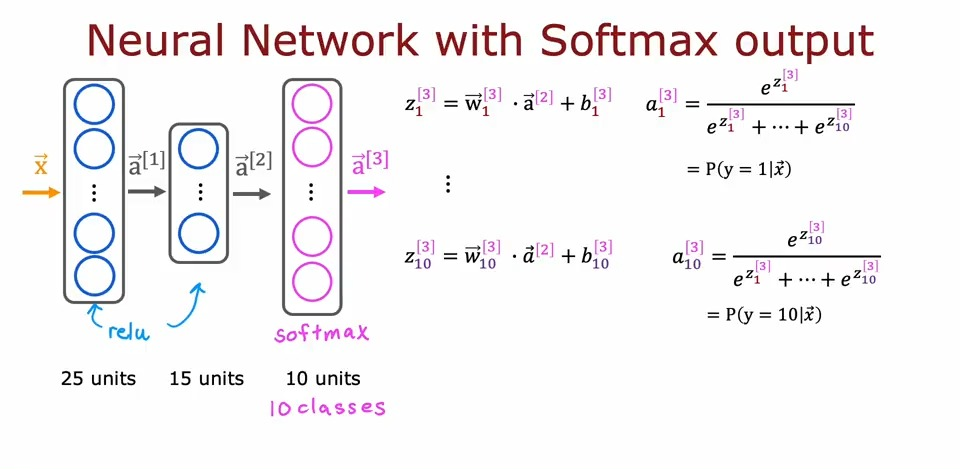

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Correct way to set learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7275 - loss: 1.4499 - val_accuracy: 0.8923 - val_loss: 0.8541
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8987 - loss: 0.8365 - val_accuracy: 0.9057 - val_loss: 0.8018
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9033 - loss: 0.8111 - val_accuracy: 0.9075 - val_loss: 0.7899
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9065 - loss: 0.7930 - val_accuracy: 0.9114 - val_loss: 0.7757
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9072 - loss: 0.7844 - val_accuracy: 0.9144 - val_loss: 0.7706
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9078 - loss: 0.7822 - val_accuracy: 0.9131 - val_loss: 0.7707
Epoch 7/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9072 - loss: 0.7806 - val_accuracy: 0.9186 - val_loss: 0.7602
Epoch 8/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9078 - loss: 0.7770 - 

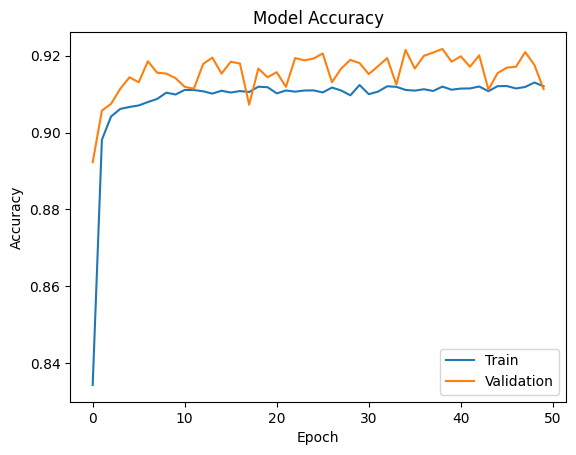

In [44]:
history= model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'])
plt.show()


Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}


The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}
![alt text](image.png)


### What is Validation Loss?

- Validation loss is the average loss (e.g., sparse categorical crossentropy) computed over the validation set.
- It indicates how well the model predicts the true labels for validation samples.
- Like training loss, it is computed as

$$
\text{Validation Loss} = -\frac{1}{M} \sum_{i=1}^M \log(p_{i,y_i}^{val})
$$

where $M$ is the size of the validation batch, and $p_{i,y_i}^{val}$ is the predicted probability of the true class for validation sample $i$.
- A lower validation loss indicates better model performance on unseen data.


### What is Validation Accuracy?

- Validation accuracy is the fraction of correctly predicted samples in the validation set.
- It is computed similarly to training accuracy:

$$
\text{Validation Accuracy} = \frac{1}{M} \sum_{i=1}^M \mathbb{I}(y_i^{val} = \hat{y}_i^{val})
$$

where $y_i^{val}$ is the true label and $\hat{y}_i^{val}$ is the predicted label for the $i$-th validation sample.
- It shows the proportion of correct predictions on unseen validation data.


### Why are validation metrics important?

- They help you monitor model generalization during training.
- If validation loss and accuracy remain close to training values, the model generalizes well.
- If there's a big gap (e.g., low training loss but high validation loss), it often indicates overfitting.
- You use these metrics to make decisions like early stopping, hyperparameter tuning, or regularization adjustments.

**Summary:**


| Metric | Definition | Purpose |
| :-- | :-- | :-- |
| **Validation Loss** | Average loss on validation data | Measures prediction error on unseen data |
| **Validation Accuracy** | Fraction of correct predictions on validation data | Measures correctness on unseen data |

They are computed using exactly the same formulas as training loss and accuracy, just evaluated on a separate validation set.



now test the model
```python   

model.predict()
```

28,000 testing example

# Importing Required Libraries
for using logistic regression form sklearn

```python

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming y_test is available for evaluation

In [46]:
# Properly split the data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build and train logistic regression model
model_log = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model_log.fit(X_train_log, y_train_log)

# Predict and evaluate
y_pred_log = model_log.predict(X_test_log)
accuracy = accuracy_score(y_test_log, y_pred_log)

print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")


d:\project\Testing\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 91.92%


C:\Users\Victus\AppData\Local\Temp\ipykernel_22048\3925350065.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


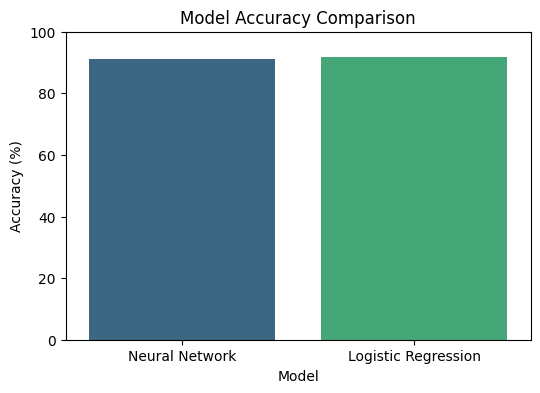

In [ ]:
# Predict using the neural network model

# Collect accuracy scores
nn_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy from neural network
log_accuracy = accuracy  # Logistic regression accuracy from previous cell

# Prepare DataFrame for visualization
results_df = pd.DataFrame({
    'Model': ['Neural Network', 'Logistic Regression'],
    'Accuracy': [nn_accuracy * 100, log_accuracy * 100]
})

# Visualize with Seaborn
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

In [48]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_test = test / 255.0
X_test.shape

(28000, 784)

In [50]:
# Neural Network prediction (probabilities → class labels)
y_pred_nn = model.predict(X_test)                 # shape: (n_samples, 10)
y_pred_nn_labels = np.argmax(y_pred_nn, axis=1)   # Convert to class labels

# Logistic Regression prediction (direct class labels)
y_pred_log = model_log.predict(X_test)


875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step


In [51]:
y_pred_nn_labels,y_pred_log

(array([2, 0, 9, ..., 3, 9, 2], dtype=int64),
 array([2, 0, 9, ..., 3, 9, 2], dtype=int64))

In [ ]:

def compare_predictions(y1, y2, name1="y1", name2="y2"):
    acc = accuracy_score(y1, y2)
    print(f"Accuracy between {name1} and {name2}: {acc * 100:.2f}%")
    
    print("\nClassification Report:")
    print(classification_report(y1, y2))

    cm = confusion_matrix(y1, y2)

    # Visualization of confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y1), yticklabels=np.unique(y2))
    plt.xlabel(f"{name2} Predictions")
    plt.ylabel(f"{name1} Predictions")
    plt.title(f"Confusion Matrix: {name1} vs {name2}")
    plt.tight_layout()
    plt.show()


Accuracy between Logistic Regression and Neural Network: 92.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2774
           1       0.95      0.98      0.96      3273
           2       0.95      0.87      0.91      2771
           3       0.94      0.90      0.92      2748
           4       0.92      0.96      0.94      2773
           5       0.87      0.91      0.89      2516
           6       0.93      0.95      0.94      2794
           7       0.94      0.94      0.94      2890
           8       0.93      0.88      0.90      2668
           9       0.91      0.91      0.91      2793

    accuracy                           0.93     28000
   macro avg       0.93      0.93      0.93     28000
weighted avg       0.93      0.93      0.93     28000


Confusion Matrix:
[[2683    0    6   11    2   39   15    4   12    2]
 [   0 3207    5    3    4   20    1    9   22    2]
 [  32   45 2412   34   31  

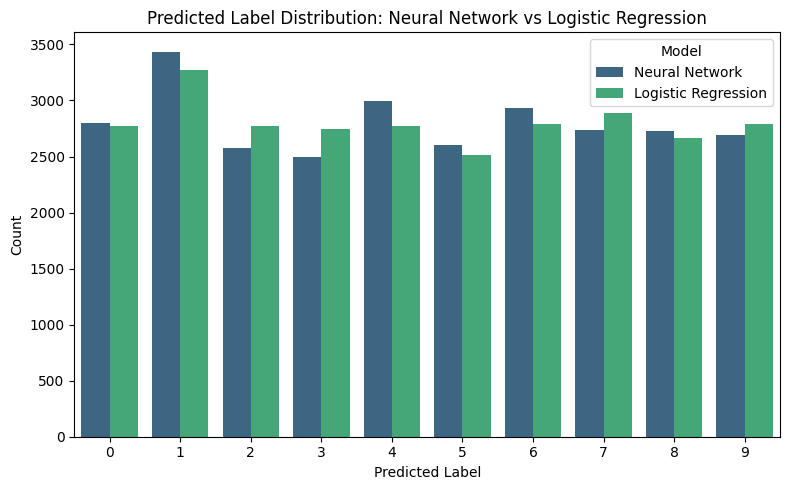

In [55]:
# Prepare DataFrame for comparison
comparison_df = pd.DataFrame({
    'Neural Network': y_pred_nn_labels,
    'Logistic Regression': y_pred_log
})

# Plot countplot for both predictions
plt.figure(figsize=(8, 5))
sns.countplot(data=comparison_df.melt(var_name='Model', value_name='Predicted Label'),
              x='Predicted Label', hue='Model', palette='viridis')
plt.title('Predicted Label Distribution: Neural Network vs Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [60]:
predictions = y_pred_nn_labels  # Use Neural Network predictions for submission
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(predictions)+1),
    "Label": predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv
